# NBA ALL STAR GAME ANALYSIS (2000-2016)

<img src="NBA1.jpeg" style="width:800px;height:400px"/>

In [340]:
#Importing basic Libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import json
import plotly.express as px




from wordcloud import WordCloud, STOPWORDS
from PIL import Image


from IPython.display import Image

import warnings
warnings.filterwarnings('ignore')


In [341]:
#Importing Libraries for visualiztion
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
from matplotlib import rcParams
%matplotlib inline
import seaborn as sns

In [342]:
#Loading the csv file for analysis
nba=pd.read_csv('NBA All Stars 2000-2016 - Sheet1.csv')

# Cleaning ,Manipulating and Evaluating the Data

In [343]:
#Checking the Datatypes of each column
nba.dtypes

Year                 int64
Player              object
Pos                 object
HT                  object
WT                   int64
Team                object
Selection Type      object
NBA Draft Status    object
Nationality         object
dtype: object

In [344]:
# Expanding the Coulmns to get a neat dataset
pd.set_option('display.max_rows', 500)
pd.set_option('display.max_columns', 500)
pd.set_option('display.width', 1000)
nba.head(20)

,Year,Player,Pos,HT,WT,Team,Selection Type,NBA Draft Status,Nationality
0,2016,Stephen Curry,G,6-3,190,Golden State Warriors,Western All-Star Fan Vote Selection,2009 Rnd 1 Pick 7,United States
1,2016,James Harden,SG,6-5,220,Houston Rockets,Western All-Star Fan Vote Selection,2009 Rnd 1 Pick 3,United States
2,2016,Kevin Durant,SF,6-9,240,Golden State Warriors,Western All-Star Fan Vote Selection,2007 Rnd 1 Pick 2,United States
3,2016,Kawhi Leonard,F,6-7,230,San Antonio Spurs,Western All-Star Fan Vote Selection,2011 Rnd 1 Pick 15,United States
4,2016,Anthony Davis,PF,6-11,253,New Orleans Pelicans,Western All-Star Fan Vote Selection,2012 Rnd 1 Pick 1,United States
5,2016,Russell Westbrook,G,6-3,200,Oklahoma City Thunder,Western All-Star Coaches Selection,2008 Rnd 1 Pick 4,United States
6,2016,DeMarcus Cousins,C,6-11,270,Sacramento Kings,Western All-Star Coaches Selection,2010 Rnd 1 Pick 5,United States
7,2016,Klay Thompson,G,6-7,215,Golden State Warriors,Western All-Star Coaches Selection,2011 Rnd 1 Pick 11,United States
8,2016,Draymond Green,F,6-7,230,Golden State Warriors,Western All-Star Coaches Selection,2012 Rnd 2 Pick 5,United States
9,2016,Marc Gasol,C,7-1,255,Memphis Grizzlies,Western All-Star Coaches Selection,2007 Rnd 2 Pick 18,Spain


In [345]:
#Checking for Null values
nba.isnull().sum()

Year                0
Player              0
Pos                 0
HT                  0
WT                  0
Team                0
Selection Type      0
NBA Draft Status    0
Nationality         0
dtype: int64

# Identifying Different Nationalities

In [346]:
#I dentifying players from different Countries
foreigners=nba[nba.Nationality!='United States']
foreigners

,Year,Player,Pos,HT,WT,Team,Selection Type,NBA Draft Status,Nationality
9,2016,Marc Gasol,C,7-1,255,Memphis Grizzlies,Western All-Star Coaches Selection,2007 Rnd 2 Pick 18,Spain
12,2016,Kyrie Irving,G,6-3,193,Cleveland Cavaliers,Eastern All-Star Fan Vote Selection,2011 Rnd 1 Pick 1,United States\nAustralia
15,2016,Giannis Antetokounmpo,F,6-11,222,Milwaukee Bucks,Eastern All-Star Fan Vote Selection,2013 Rnd 1 Pick 15,Greece\nNigeria
36,2015,Pau Gasol,FC,7-0,250,Chicago Bulls,Eastern All-Star Replacement Selection,2001 Rnd 1 Pick 3,Spain
37,2015,Al Horford,FC,6-10,245,Atlanta Hawks,Eastern All-Star Replacement Selection,2007 Rnd 1 Pick 3,Dominican Republic\nUnited States
53,2014,Pau Gasol,FC,7-0,250,Chicago Bulls,Eastern All-Star Fan Vote Selection,2001 Rnd 1 Pick 3,Spain
55,2014,Al Horford,FC,6-10,245,Atlanta Hawks,Eastern All-Star Coaches Selection,2007 Rnd 1 Pick 3,Dominican Republic\nUnited States
59,2014,Kyrie Irving,G,6-3,193,Cleveland Cavaliers,Eastern All-Star Coaches Selection,2011 Rnd 1 Pick 1,United States\nAustralia
66,2014,Marc Gasol,C,7-1,255,Memphis Grizzlies,Western All-Star Fan Vote Selection,2007 Rnd 2 Pick 18,Spain
77,2014,Dirk Nowitzki,PF,7-0,245,Dallas Mavericks,Western All-Star Replacement Selection,1998 Rnd 1 Pick 9,Germany


In [347]:
#Which foreign country has the most representation 

teamf=foreigners['Nationality'].value_counts()
teamcountf=teamf.reset_index()
teamcountf.columns=['Nationality','Count']
teamcountf



,Nationality,Count
0,Germany,13
1,Spain,9
2,Canada\nSouth Africa,8
3,China,8
4,France,6
5,United States\nAustralia,4
6,Dominican Republic\nUnited States,4
7,Serbia\nGreece,3
8,Germany\nUnited States,2
9,Argentina,2


Text(0.5, 0, 'Nationality')

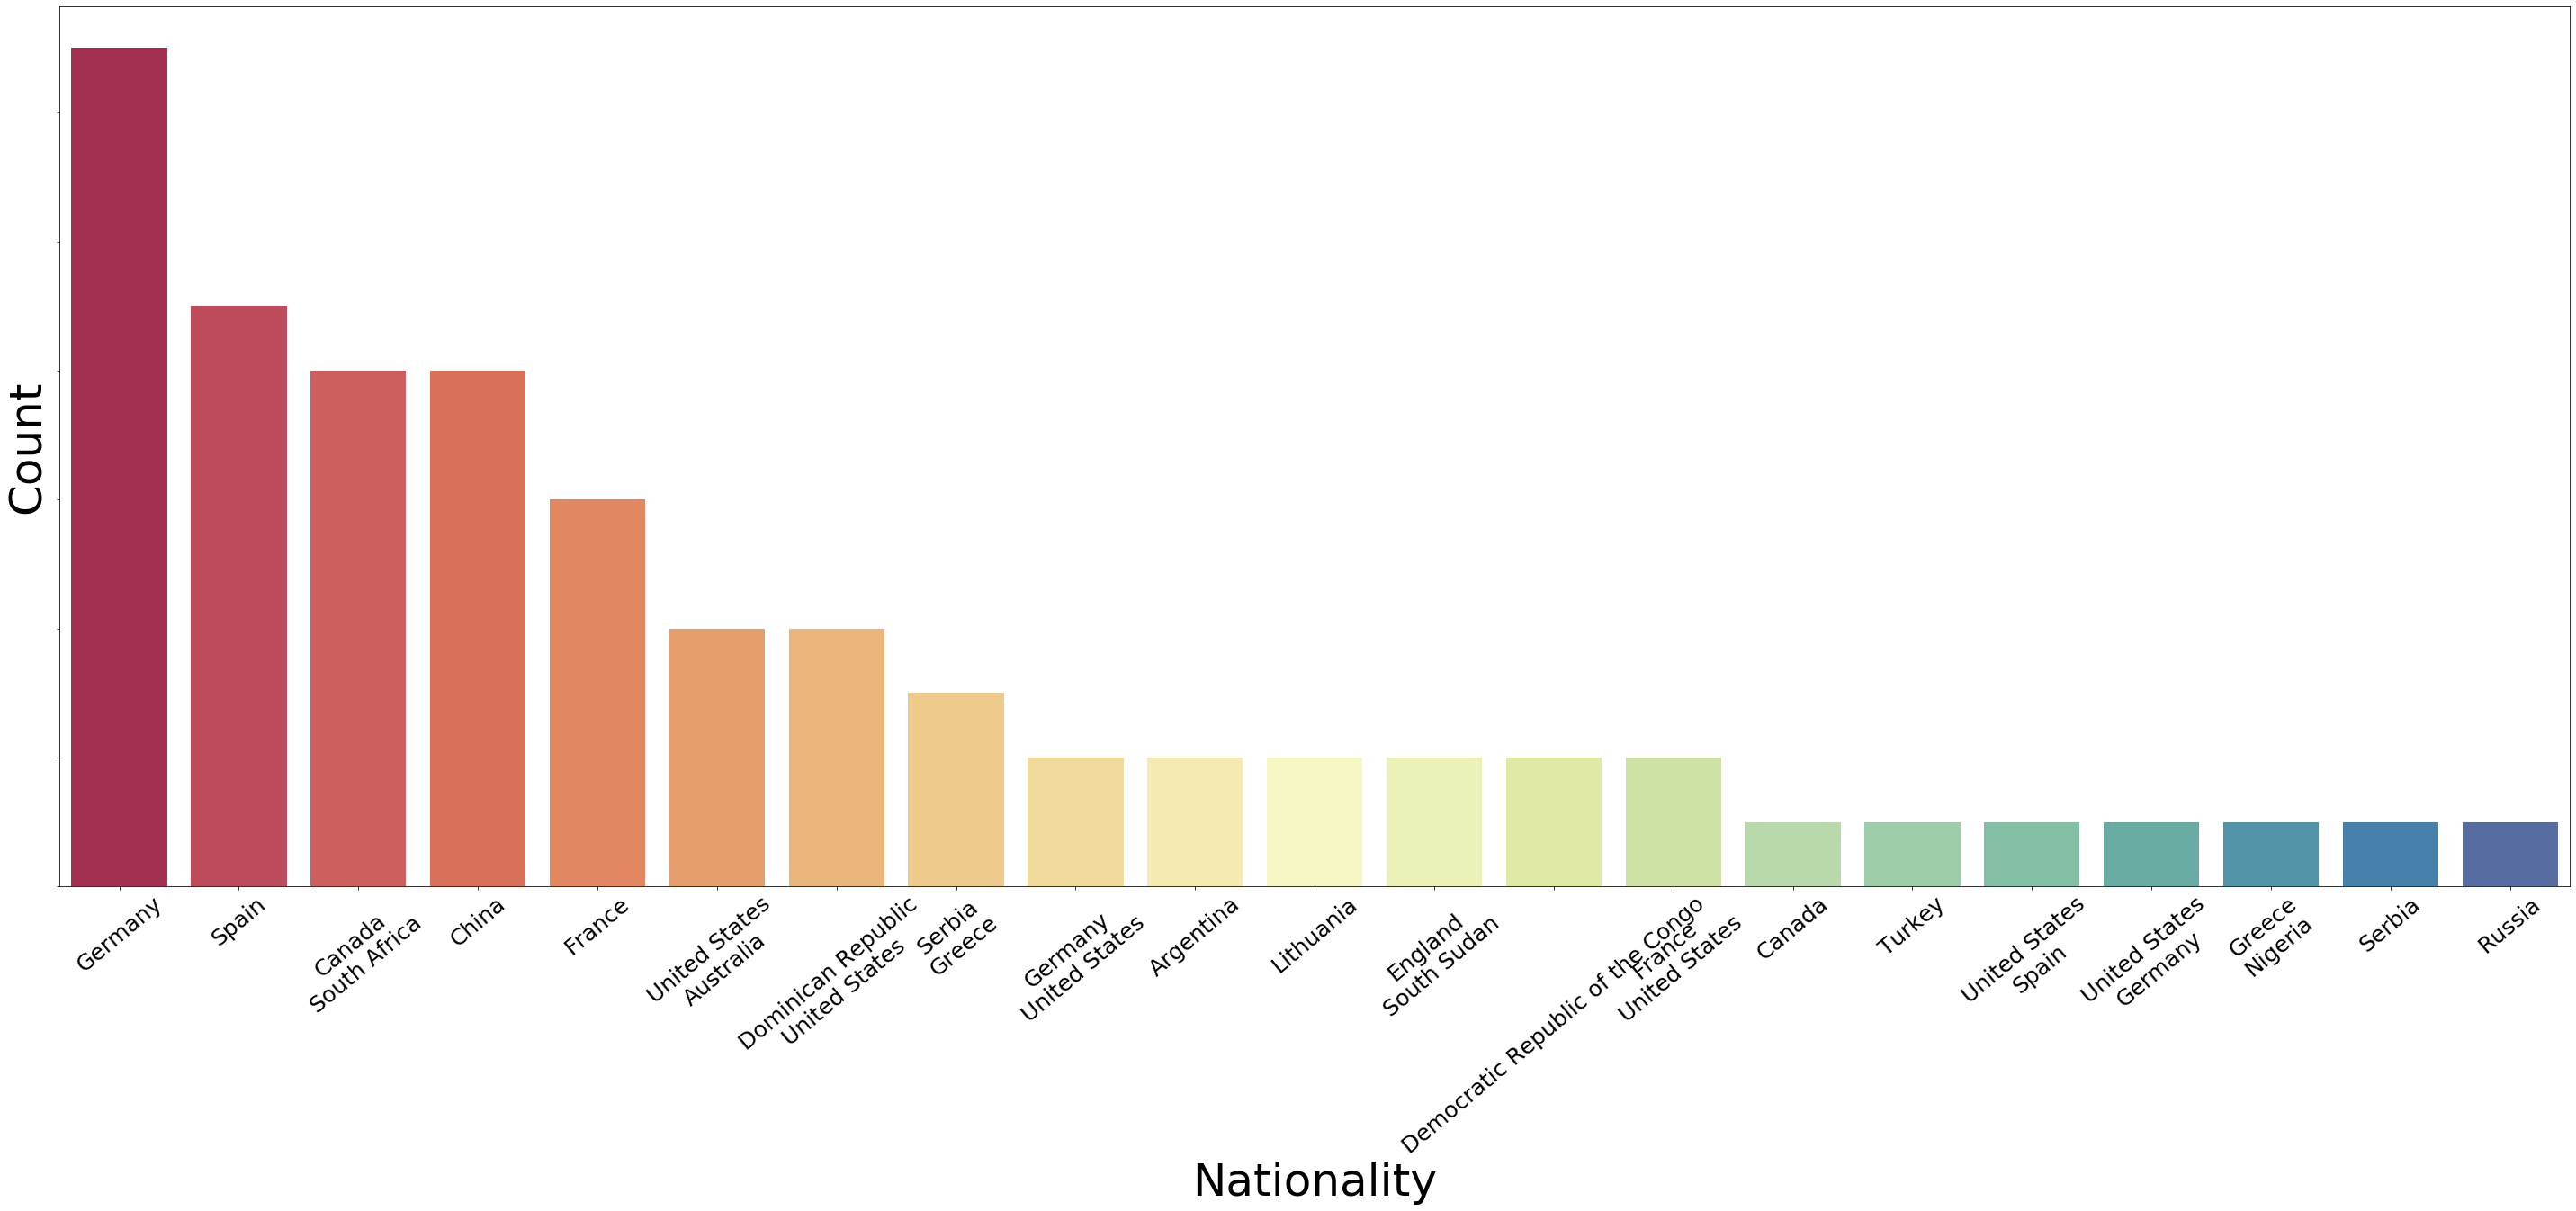

In [348]:
#Lets See a visual rep of the above
plt.figure(figsize=(50,18))


a = sns.barplot(x='Nationality',y='Count', data=teamcountf, palette='Spectral')

a.set_xticklabels(a.get_xticklabels(), rotation = 40, fontsize = 25)
a.set_yticklabels(a.get_yticklabels(), rotation = 40, fontsize = 30)
a.set_ylabel('Count',fontsize=50)
a.set_xlabel('Nationality',fontsize=50)


# Inserting new column to convert height into Inches

In [349]:
#Lets Evaluate how tall the  players are
#Converting the height column into string value 
nba['HT'] = nba['HT'].astype(str)


In [350]:
# Splitting the height coulmn into feet and inches 
split_data = nba["HT"].str.split("-")
#Creating a new dataframe for the values 
data = split_data.to_list()
names = ["Feet", "Inches"]
new_df = pd.DataFrame(data, columns=names)
new_df

,Feet,Inches
0,6,3
1,6,5
2,6,9
3,6,7
4,6,11
5,6,3
6,6,11
7,6,7
8,6,7
9,7,1


In [351]:
#Adding the feet and Inches Coumn to the main dataframe 
nba2 = pd.concat([nba,new_df], axis=1, sort = False)
nba2


,Year,Player,Pos,HT,WT,Team,Selection Type,NBA Draft Status,Nationality,Feet,Inches
0,2016,Stephen Curry,G,6-3,190,Golden State Warriors,Western All-Star Fan Vote Selection,2009 Rnd 1 Pick 7,United States,6,3
1,2016,James Harden,SG,6-5,220,Houston Rockets,Western All-Star Fan Vote Selection,2009 Rnd 1 Pick 3,United States,6,5
2,2016,Kevin Durant,SF,6-9,240,Golden State Warriors,Western All-Star Fan Vote Selection,2007 Rnd 1 Pick 2,United States,6,9
3,2016,Kawhi Leonard,F,6-7,230,San Antonio Spurs,Western All-Star Fan Vote Selection,2011 Rnd 1 Pick 15,United States,6,7
4,2016,Anthony Davis,PF,6-11,253,New Orleans Pelicans,Western All-Star Fan Vote Selection,2012 Rnd 1 Pick 1,United States,6,11
5,2016,Russell Westbrook,G,6-3,200,Oklahoma City Thunder,Western All-Star Coaches Selection,2008 Rnd 1 Pick 4,United States,6,3
6,2016,DeMarcus Cousins,C,6-11,270,Sacramento Kings,Western All-Star Coaches Selection,2010 Rnd 1 Pick 5,United States,6,11
7,2016,Klay Thompson,G,6-7,215,Golden State Warriors,Western All-Star Coaches Selection,2011 Rnd 1 Pick 11,United States,6,7
8,2016,Draymond Green,F,6-7,230,Golden State Warriors,Western All-Star Coaches Selection,2012 Rnd 2 Pick 5,United States,6,7
9,2016,Marc Gasol,C,7-1,255,Memphis Grizzlies,Western All-Star Coaches Selection,2007 Rnd 2 Pick 18,Spain,7,1


In [352]:
#Changing back the feet and inches value to int type 
nba2['Feet'] = nba2['Feet'].astype(int)
nba2['Inches'] = nba2['Inches'].astype(int)

In [353]:
#Assigning a column which calculates the total height in Inches.
nba22=nba2.assign(tot_height=nba2['Feet'] * 12+nba2['Inches'])
nba22


,Year,Player,Pos,HT,WT,Team,Selection Type,NBA Draft Status,Nationality,Feet,Inches,tot_height
0,2016,Stephen Curry,G,6-3,190,Golden State Warriors,Western All-Star Fan Vote Selection,2009 Rnd 1 Pick 7,United States,6,3,75
1,2016,James Harden,SG,6-5,220,Houston Rockets,Western All-Star Fan Vote Selection,2009 Rnd 1 Pick 3,United States,6,5,77
2,2016,Kevin Durant,SF,6-9,240,Golden State Warriors,Western All-Star Fan Vote Selection,2007 Rnd 1 Pick 2,United States,6,9,81
3,2016,Kawhi Leonard,F,6-7,230,San Antonio Spurs,Western All-Star Fan Vote Selection,2011 Rnd 1 Pick 15,United States,6,7,79
4,2016,Anthony Davis,PF,6-11,253,New Orleans Pelicans,Western All-Star Fan Vote Selection,2012 Rnd 1 Pick 1,United States,6,11,83
5,2016,Russell Westbrook,G,6-3,200,Oklahoma City Thunder,Western All-Star Coaches Selection,2008 Rnd 1 Pick 4,United States,6,3,75
6,2016,DeMarcus Cousins,C,6-11,270,Sacramento Kings,Western All-Star Coaches Selection,2010 Rnd 1 Pick 5,United States,6,11,83
7,2016,Klay Thompson,G,6-7,215,Golden State Warriors,Western All-Star Coaches Selection,2011 Rnd 1 Pick 11,United States,6,7,79
8,2016,Draymond Green,F,6-7,230,Golden State Warriors,Western All-Star Coaches Selection,2012 Rnd 2 Pick 5,United States,6,7,79
9,2016,Marc Gasol,C,7-1,255,Memphis Grizzlies,Western All-Star Coaches Selection,2007 Rnd 2 Pick 18,Spain,7,1,85


In [354]:
# Rechecking the datatypes 
nba22.dtypes

Year                 int64
Player              object
Pos                 object
HT                  object
WT                   int64
Team                object
Selection Type      object
NBA Draft Status    object
Nationality         object
Feet                 int64
Inches               int64
tot_height           int64
dtype: object

In [355]:
# Evaluating the positions players stand at based on their height
b = px.box(nba22, x="Pos", y= "tot_height")
b.show()

# Evaluating how Players are selected in NBA

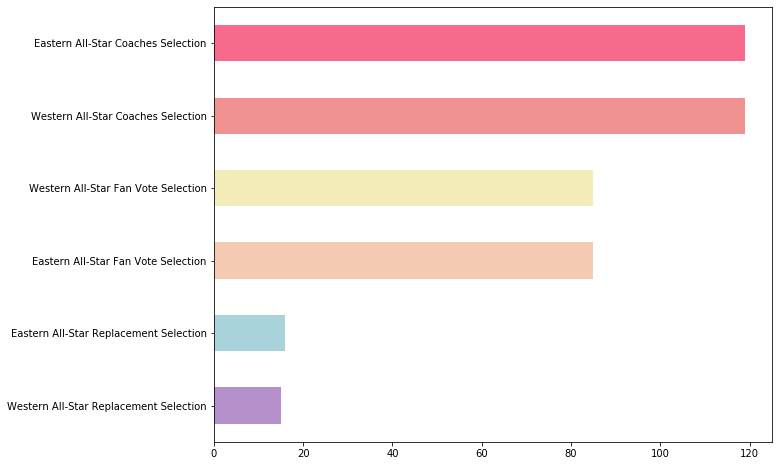

In [356]:
# Evaluating the major mode of selection into teams each player gets 
plt.rcParams['figure.figsize'] = (10, 8)
selection_type=nba22['Selection Type'].value_counts(ascending=True).plot(kind='barh',color=['#b590ca','#a8d3da','#f5cab3','#f3ecb8','#f19292','#f76a8c'])


# Analysis of Weight

In [357]:
# Evaluating players less than the average weight i.e the skinny ones 
skinny_player=nba22[nba22.WT<200]
ct1=skinny_player.groupby(['Player']).mean()
ct1.sort_values(['WT'], 
                 ascending=False,inplace=True)

r = ct1.reset_index()

r

,Player,Year,WT,Feet,Inches,tot_height
0,Mo Williams,2008.000000,198.0,6.0,1.0,73.0
1,Damian Lillard,2013.500000,195.0,6.0,3.0,75.0
2,Steve Francis,2002.000000,195.0,6.0,3.0,75.0
3,Kyrie Irving,2013.750000,193.0,6.0,3.0,75.0
4,Richard Hamilton,2006.000000,193.0,6.0,7.0,79.0
5,Gilbert Arenas,2005.000000,191.0,6.0,3.0,75.0
6,Derrick Rose,2010.000000,190.0,6.0,3.0,75.0
7,Stephen Curry,2014.500000,190.0,6.0,3.0,75.0
8,Jameer Nelson,2008.000000,190.0,6.0,0.0,72.0
9,Latrell Sprewell,2000.000000,190.0,6.0,5.0,77.0


<Figure size 720x3600 with 0 Axes>

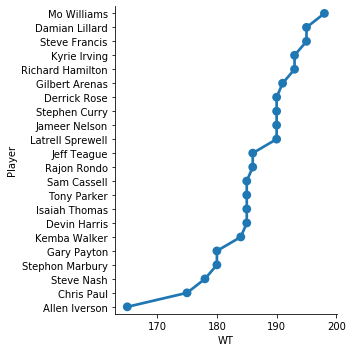

In [358]:
#Plotting a graph to see who they are 
plt.figure(figsize=(10,50))
sns.catplot( x='WT',y='Player', data=r, kind='point')

In [359]:
# And Where they stand on the court
b1 = px.box(skinny_player, x="Pos", y= "WT")
b1.show()

In [362]:
# Who the not so skinny Players??
Not_Skinny_player=nba22[nba22.WT>200]
ct2=Not_Skinny_player.groupby(['Player']).mean()
ct2.sort_values(['WT'], 
                 ascending=False,inplace=True)

r2 = ct2.reset_index()

r2

,Player,Year,WT,Feet,Inches,tot_height
0,Shaquille O'Neal,2003.625000,325.0,7.0,1.0,85.0
1,Yao Ming,2005.625000,310.0,7.0,6.0,90.0
2,Andrew Bynum,2011.000000,285.0,7.0,0.0,84.0
3,Andre Drummond,2015.000000,279.0,6.0,11.0,83.0
4,DeMarcus Cousins,2015.000000,270.0,6.0,11.0,83.0
5,Roy Hibbert,2012.000000,270.0,7.0,2.0,86.0
6,Brook Lopez,2012.000000,268.0,7.0,0.0,84.0
7,Carlos Boozer,2006.500000,266.0,6.0,9.0,81.0
8,Dwight Howard,2009.500000,265.0,6.0,11.0,83.0
9,DeAndre Jordan,2016.000000,265.0,6.0,11.0,83.0


In [364]:
# Where do most of them stand during game play?
b1 = px.box(Not_Skinny_player, x="Pos", y= "WT")
b1.show()

# Time Series Analysis 

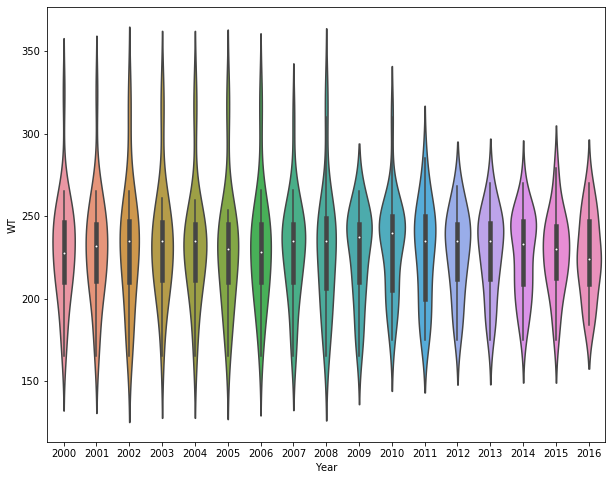

In [361]:
# Time Analysis to see how the weight through the years have been to be a NBA player
visual3=sns.violinplot(data = nba22,x='Year',y='WT')

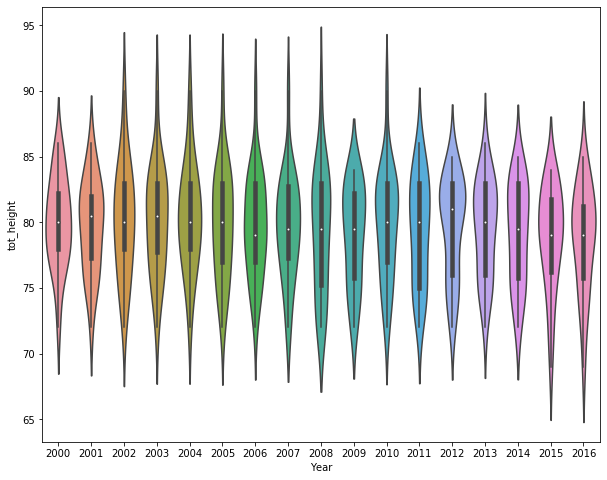

In [338]:
# Time Analysis to see how the height through the years have been to be a NBA player
visual4=sns.violinplot(data = nba22,x='Year',y='tot_height')

# Tallest player evaluations 

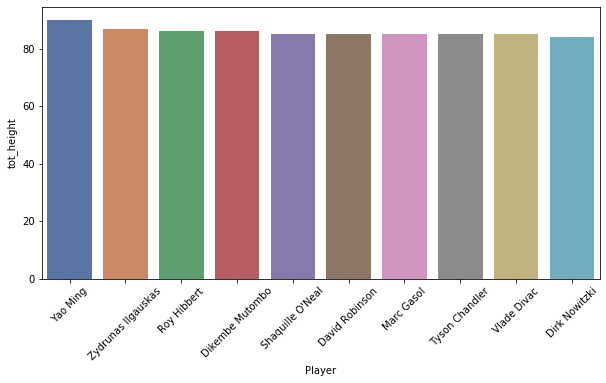

In [321]:
# 10 tallest players (Who are they ?)
nba22['tot_height'].mean()
tallest_player=nba22[nba22.tot_height>80]

result = tallest_player.sort_values(['tot_height'], ascending = False)
d = dict(zip(result.Player,result.tot_height))
a = pd.DataFrame(d.items(), columns=['Player', 'tot_height'])
plt.figure(figsize=(10,5))
ds = a
ds = ds.head(10)
ax = sns.barplot(x='Player',y='tot_height', data=ds, palette='deep')
label = ax.set_xticklabels(ax.get_xticklabels(), rotation=45)

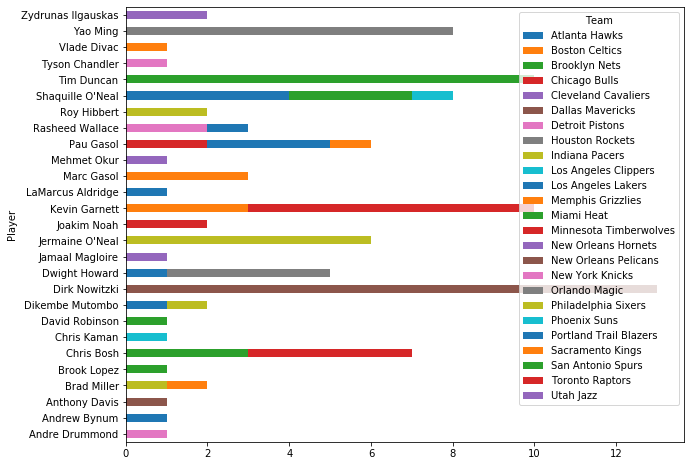

In [322]:
#Which teams have they been a part of?
plt.rcParams['figure.figsize'] = (10, 8)
capp=result.head(100)
stck1= capp.groupby(['Player','Team'])['Player'].count().unstack('Team').fillna(0)
stck1.plot(kind='barh', stacked=True)
